In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
data_train=pd.read_csv('/content/twitter_training.csv')
data_val=pd.read_csv('/content/twitter_validation.csv')


In [4]:
data_train

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [5]:
data_val

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...,...,...
994,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
995,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
997,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [6]:
data_train.columns=['id','game','sentiment','text']
data_val.columns=['id','game','sentiment','text']

In [7]:
data_train

,id,game,sentiment,text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [8]:
data_val

,id,game,sentiment,text
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...,...,...
994,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
995,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
997,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [9]:
data_train.shape

(74681, 4)

In [10]:
data_train.columns

Index(['id', 'game', 'sentiment', 'text'], dtype='object')

In [11]:
data_train.describe(include='all')

,id,game,sentiment,text
count,74681.000000,74681,74681,73995
unique,NaN,32,4,69490
top,NaN,TomClancysRainbowSix,Negative,
freq,NaN,2400,22542,172
mean,6432.640149,NaN,NaN,NaN
std,3740.423819,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN
25%,3195.000000,NaN,NaN,NaN
50%,6422.000000,NaN,NaN,NaN
75%,9601.000000,NaN,NaN,NaN


In [12]:
id_types=data_train['id'].value_counts()
id_types

,count
id,
5203,6
6164,6
6141,6
6142,6
6143,6
...,...
4678,6
4679,6
4680,6


In [13]:
data_val.shape

(999, 4)

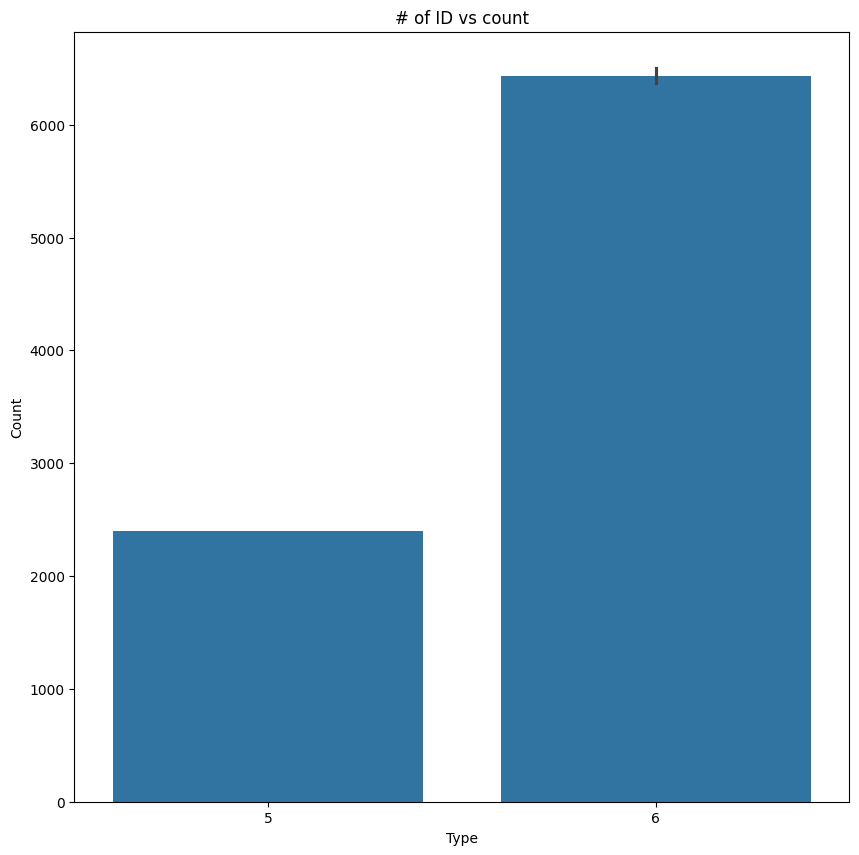

In [14]:
plt.figure(figsize=(10,10))
sns.barplot(y=id_types.index,x=id_types.values)
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('# of ID vs count')
plt.show()

In [15]:
game_types=data_train['game'].value_counts()
game_types

,count
game,
TomClancysRainbowSix,2400
MaddenNFL,2400
Microsoft,2400
LeagueOfLegends,2394
CallOfDuty,2394
Verizon,2382
CallOfDutyBlackopsColdWar,2376
ApexLegends,2376
Facebook,2370


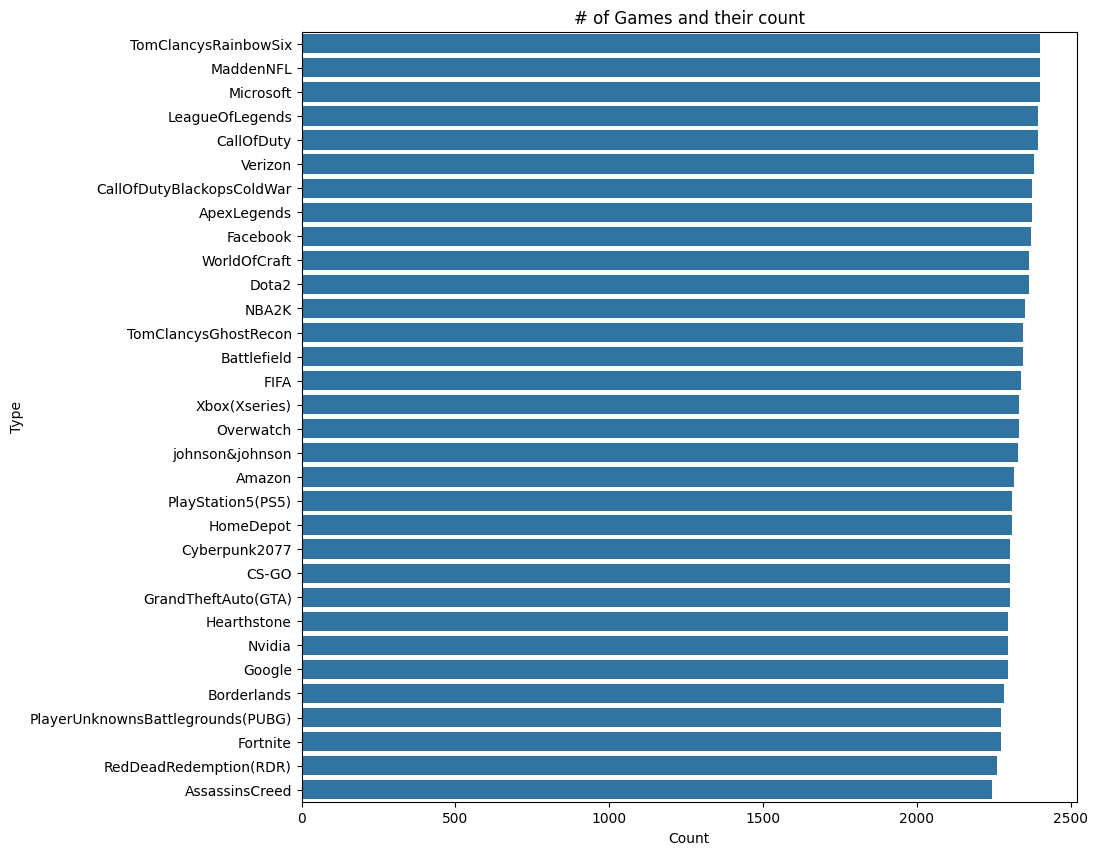

In [16]:
plt.figure(figsize=(10,10))
sns.barplot(x=game_types.values,y=game_types.index)
plt.xlabel('Count')
plt.ylabel('Type')
plt.title('# of Games and their count')
plt.show()

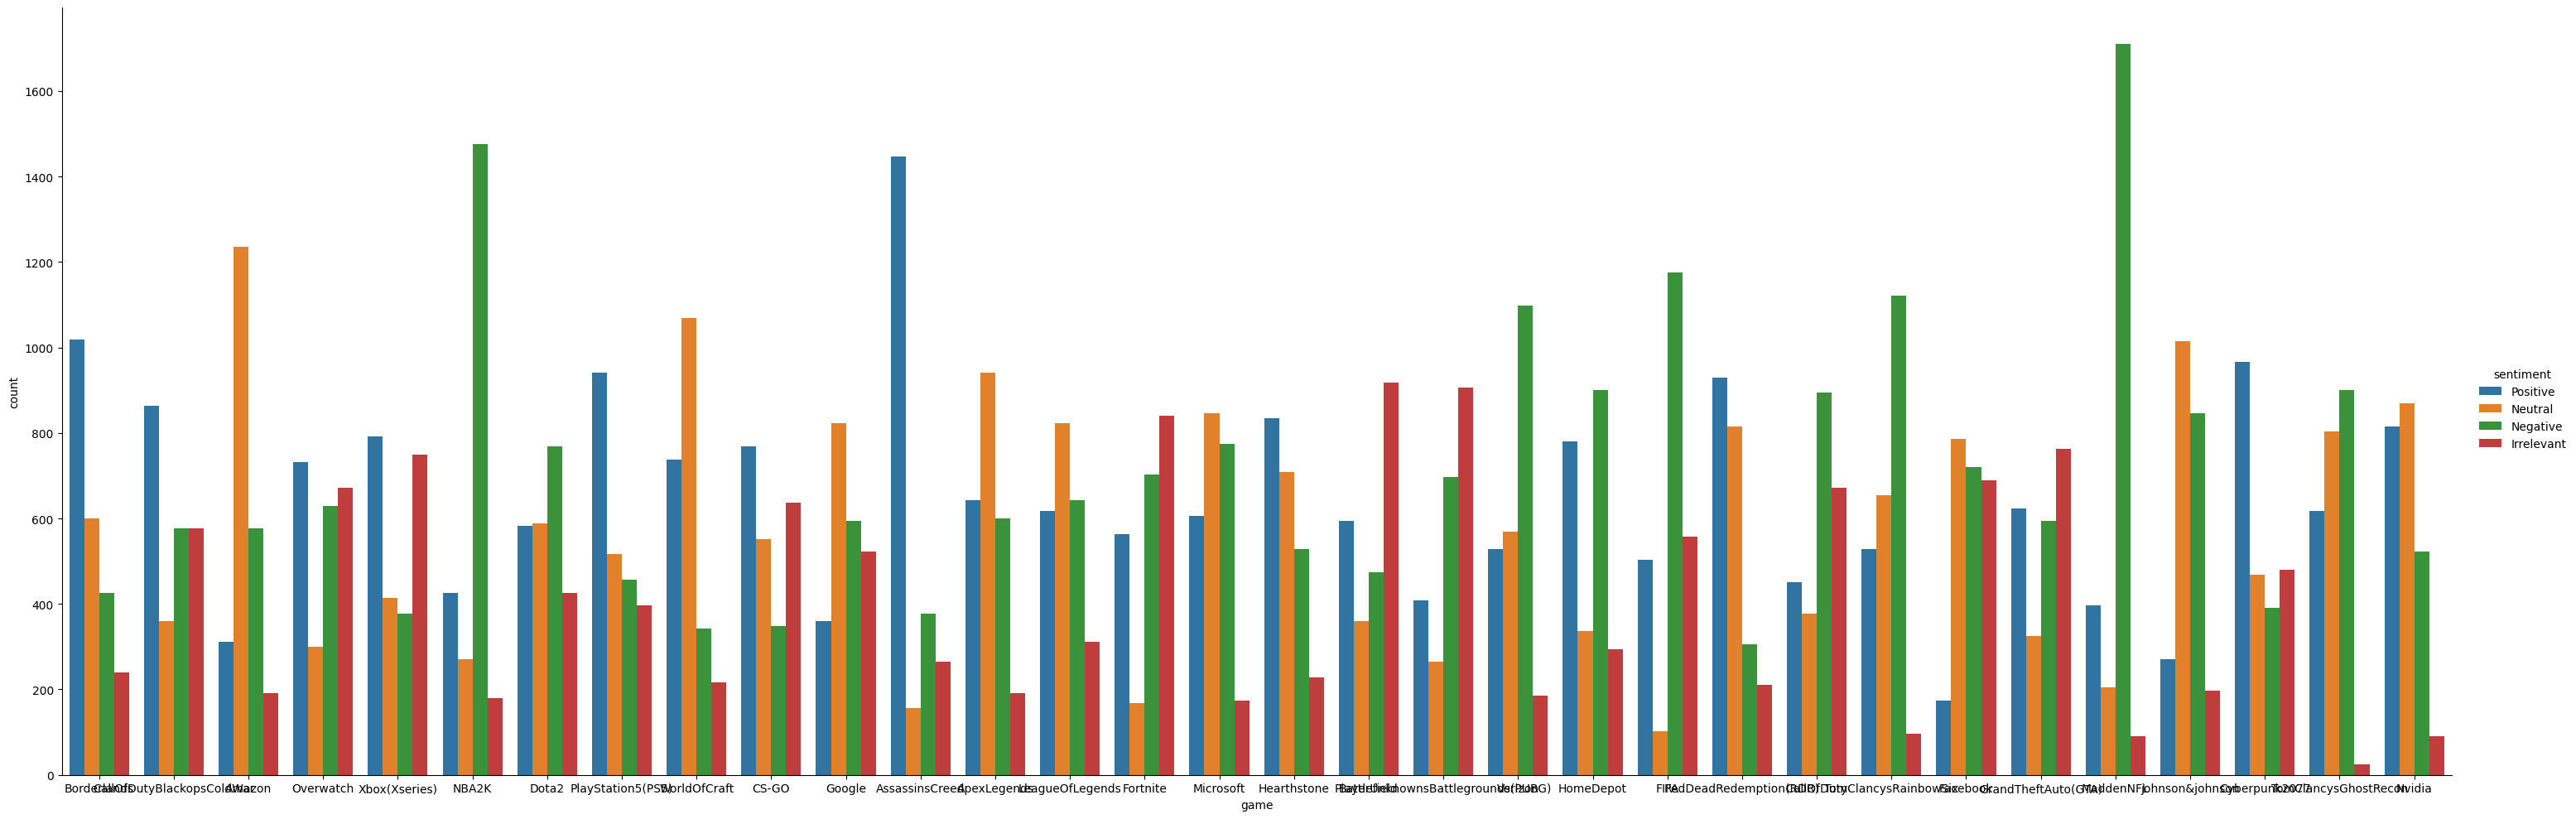

In [17]:
sns.catplot(x='game',hue='sentiment',kind='count',height=10,aspect=3,data=data_train)

<Axes: >

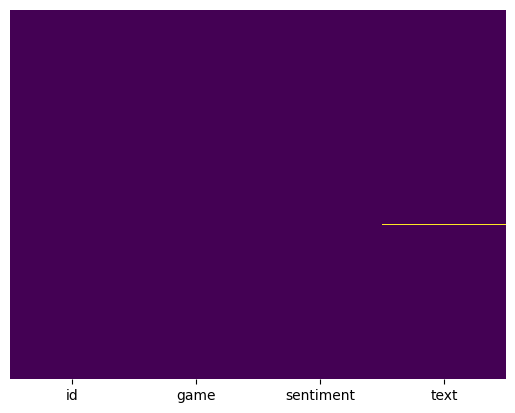

In [18]:
sns.heatmap(data_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [19]:
total_null=data_train.isnull().sum().sort_values(ascending=False)
percent=((data_train.isnull().sum()/data_train.isnull().count())*100).sort_values(ascending=False)
print("Total records=",data_train.shape[0])
missing_data=pd.concat([total_null,percent.round(2)],axis=1,keys=['Total Missing','In Percent'])
missing_data.head(10)

Total records= 74681


,Total Missing,In Percent
text,686,0.92
id,0,0.00
game,0,0.00
sentiment,0,0.00


In [20]:
data_train.dropna(subset=['text'],inplace=True)
total_null=data_train.isnull().sum().sort_values(ascending=False)
percent=((data_train.isnull().sum()/data_train.isnull().count())*100).sort_values(ascending=False)
print("Total record=",data_train.shape[0])
missing_data=pd.concat([total_null,percent.round(2)],axis=1,keys=['Total Missing','In Percent'])
missing_data.head(10)

Total record= 73995


,Total Missing,In Percent
id,0,0.0
game,0,0.0
sentiment,0,0.0
text,0,0.0


In [21]:
train0=data_train[data_train['sentiment']=='Negative']
train1=data_train[data_train['sentiment']=='Positive']
train2=data_train[data_train['sentiment']=='Irrelevant']
train3=data_train[data_train['sentiment']=='Neutral']

In [22]:
train0.shape,train1.shape,train2.shape,train3.shape

((22358, 4), (20654, 4), (12875, 4), (18108, 4))

In [23]:
train0=train0[:int(train0.shape[0]/12)]
train1=train1[:int(train1.shape[0]/12)]
train2=train2[:int(train2.shape[0]/12)]
train3=train3[:int(train3.shape[0]/12)]

In [24]:
train0.shape,train1.shape,train2.shape,train3.shape

((1863, 4), (1721, 4), (1072, 4), (1509, 4))

In [25]:
data_train=pd.concat([train0,train1,train2,train3],axis=0)
data_train

,id,game,sentiment,text
23,2405,Borderlands,Negative,the biggest dissappoinment in my life came out...
24,2405,Borderlands,Negative,The biggest disappointment of my life came a y...
25,2405,Borderlands,Negative,The biggest disappointment of my life came a y...
26,2405,Borderlands,Negative,the biggest dissappoinment in my life coming o...
27,2405,Borderlands,Negative,For the biggest male dissappoinment in my life...
...,...,...,...,...
5603,165,Amazon,Neutral,An amazing read aloud book for you and your ch...
5604,165,Amazon,Neutral,An amazing reading book for you and your child...
5605,165,Amazon,Neutral,An amazing book to read aloud for you and your...
5606,165,Amazon,Neutral,An amazing read aloud book for you and your ch...


In [26]:
id_types=data_train['id'].value_counts()
id_types

,count
id,
2405,6
1810,6
1748,6
1754,6
1760,6
...,...
1602,3
1880,3
333,3


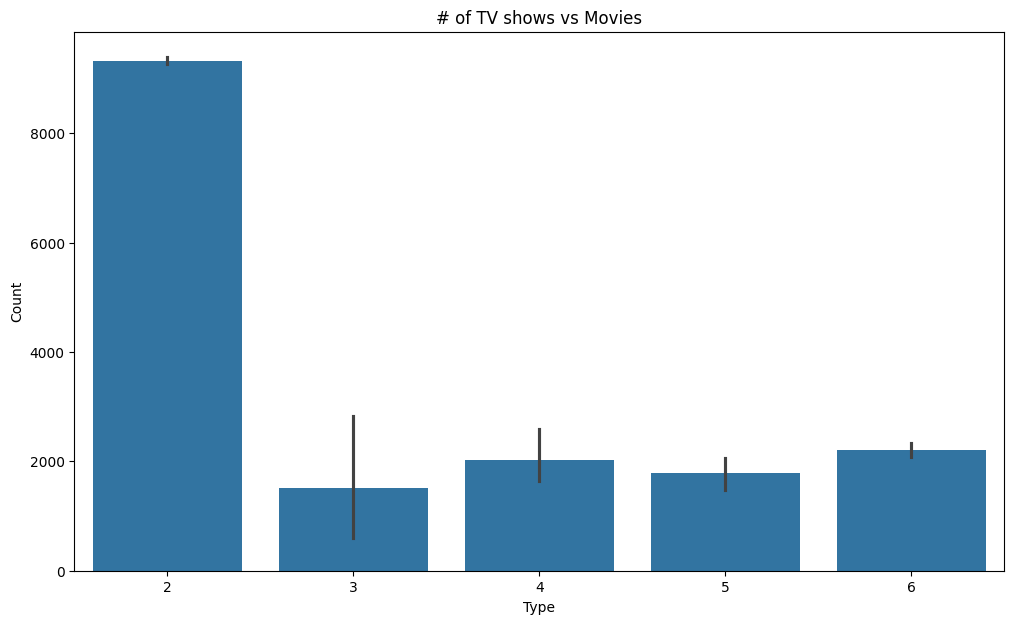

In [27]:
plt.figure(figsize=(12,7))
sns.barplot(x=id_types.values,y=id_types.index)
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('# of TV shows vs Movies')
plt.show()


In [28]:
game_types=data_train['game'].value_counts()
game_types

,count
game,
Borderlands,2279
CallOfDutyBlackopsColdWar,2192
Amazon,1321
Overwatch,373


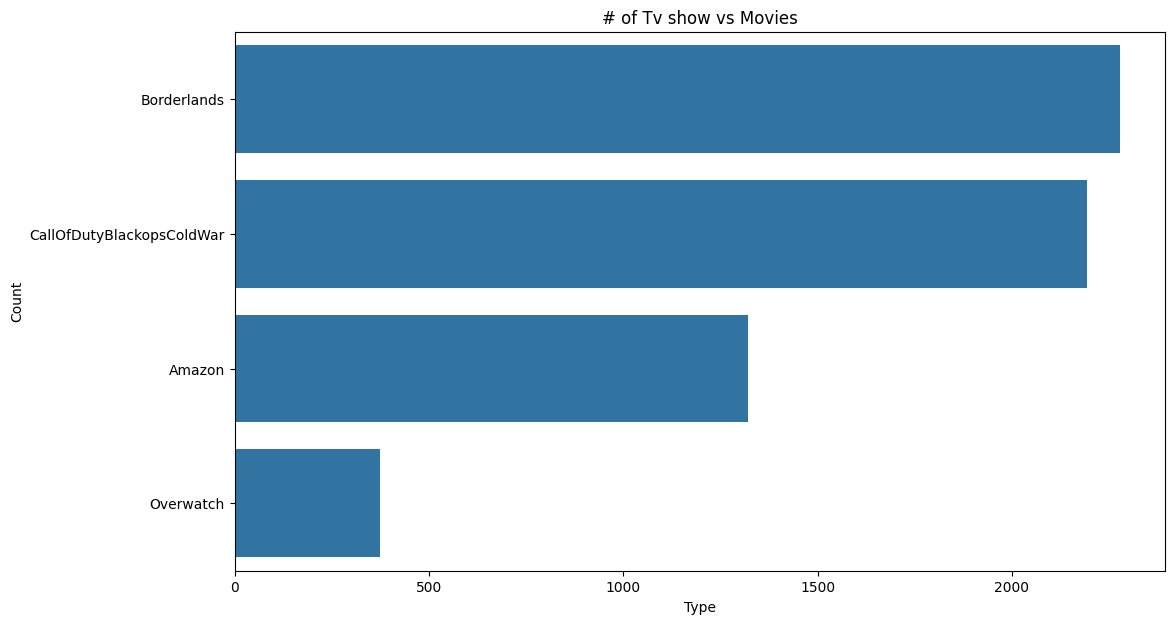

In [29]:
plt.figure(figsize=(12,7))
sns.barplot(x=game_types.values,y=game_types.index)
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('# of Tv show vs Movies')
plt.show()

In [30]:
sentiment_types=data_train['sentiment'].value_counts()
sentiment_types

,count
sentiment,
Negative,1863
Positive,1721
Neutral,1509
Irrelevant,1072


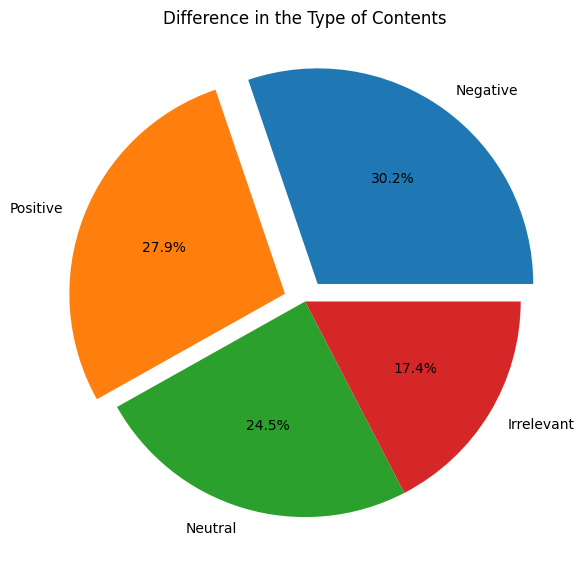

In [33]:
plt.figure(figsize=(12,7))
plt.pie(x=sentiment_types.values,labels=sentiment_types.index,autopct='%.1f%%',explode=[0.1,0.1,0,0])
plt.title('Difference in the Type of Contents')
plt.show()

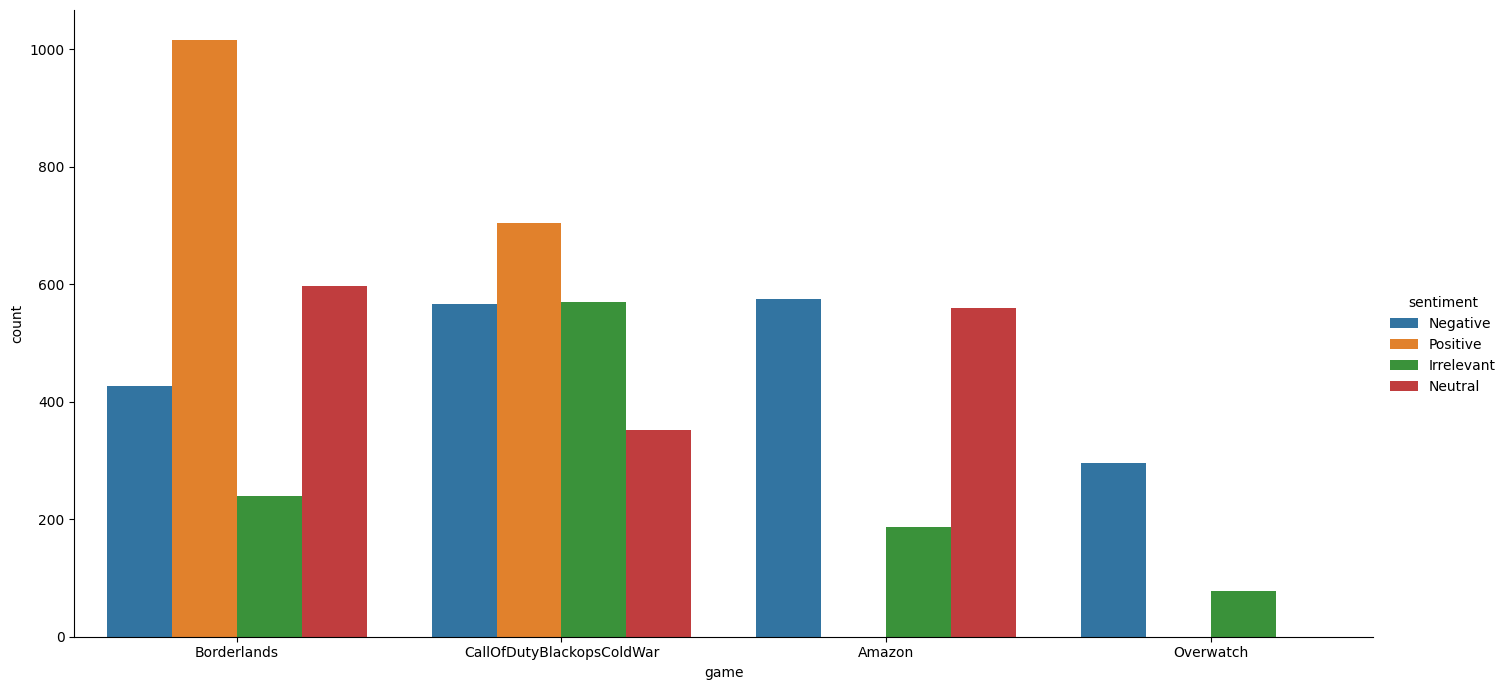

In [34]:
sns.catplot(x='game',hue='sentiment',kind='count',height=7,aspect=2,data=data_train)


In [35]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()

In [36]:
data_train=data_train.drop(['id'],axis=1)
data_train

,game,sentiment,text
23,Borderlands,Negative,the biggest dissappoinment in my life came out...
24,Borderlands,Negative,The biggest disappointment of my life came a y...
25,Borderlands,Negative,The biggest disappointment of my life came a y...
26,Borderlands,Negative,the biggest dissappoinment in my life coming o...
27,Borderlands,Negative,For the biggest male dissappoinment in my life...
...,...,...,...
5603,Amazon,Neutral,An amazing read aloud book for you and your ch...
5604,Amazon,Neutral,An amazing reading book for you and your child...
5605,Amazon,Neutral,An amazing book to read aloud for you and your...
5606,Amazon,Neutral,An amazing read aloud book for you and your ch...


In [38]:
data_train.nunique()

,0
game,4
sentiment,4
text,5854


In [39]:
data_val.nunique()

,0
id,999
game,32
sentiment,4
text,998
